##**Importing and Reading Data Set**

In [304]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [305]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/marketing_campaign_dataset.csv")
df.head(5)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [307]:
df.describe()

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


In [308]:
df.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


In [309]:
df.columns.tolist()

['Campaign_ID',
 'Company',
 'Campaign_Type',
 'Target_Audience',
 'Duration',
 'Channel_Used',
 'Conversion_Rate',
 'Acquisition_Cost',
 'ROI',
 'Location',
 'Language',
 'Clicks',
 'Impressions',
 'Engagement_Score',
 'Customer_Segment',
 'Date']

In [310]:
df.dtypes

,0
Campaign_ID,int64
Company,object
Campaign_Type,object
Target_Audience,object
Duration,object
Channel_Used,object
Conversion_Rate,float64
Acquisition_Cost,object
ROI,float64
Location,object


## **Data Cleaning**

In [311]:
df['Acquisition_Cost']=df['Acquisition_Cost'].replace('[\$,]','',regex=True).astype(float)
df['Date']=pd.to_datetime(df['Date'])
df['Campaign_ID']=df['Campaign_ID'].astype(object)

In [312]:
df.dtypes

,0
Campaign_ID,object
Company,object
Campaign_Type,object
Target_Audience,object
Duration,object
Channel_Used,object
Conversion_Rate,float64
Acquisition_Cost,float64
ROI,float64
Location,object


## **Exploratory Data Analysis**

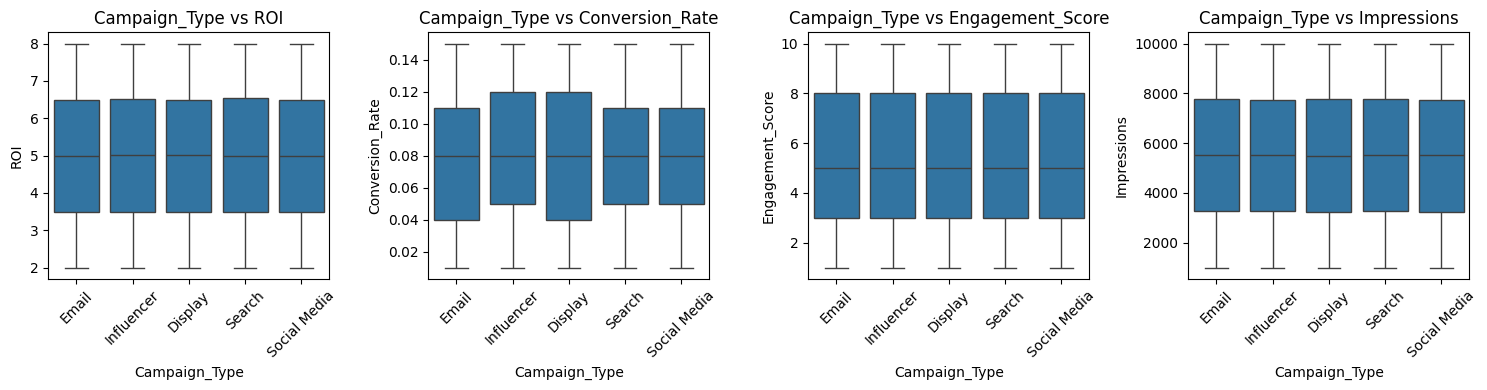

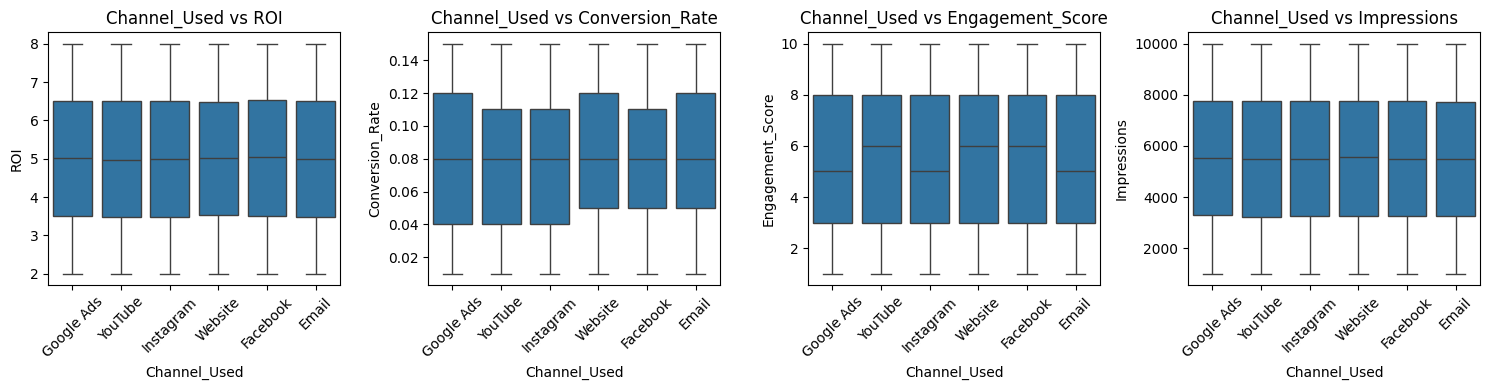

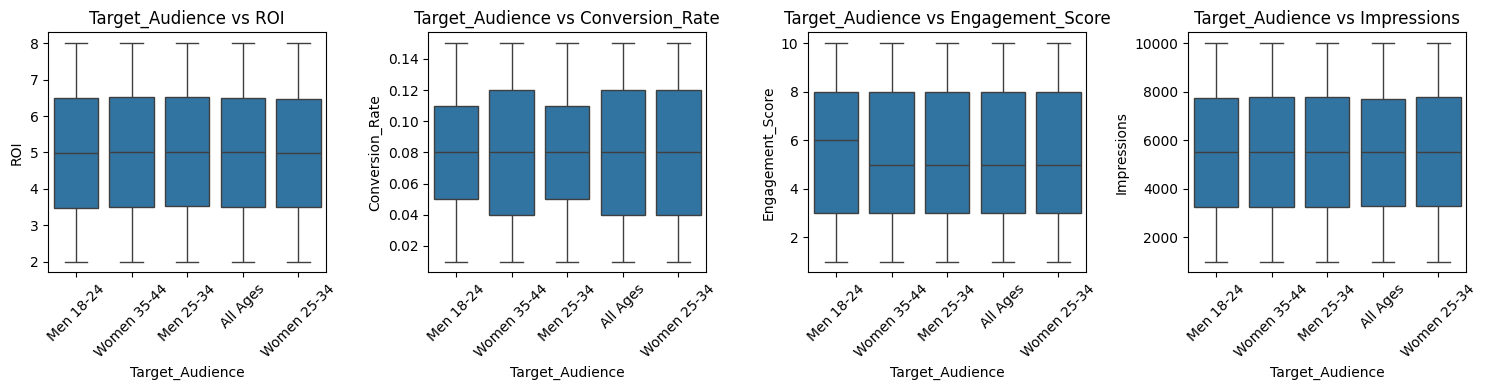

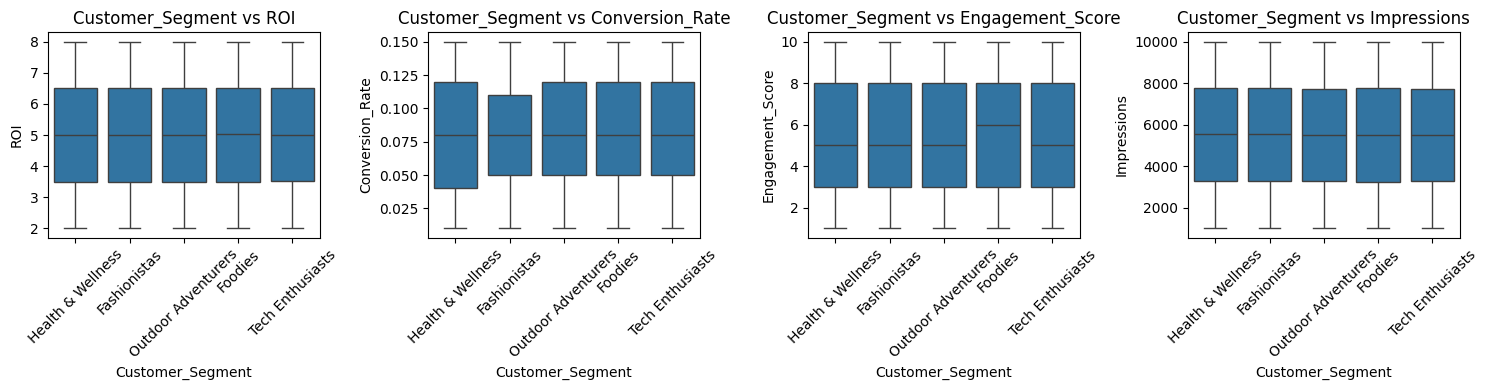

In [313]:
yaxis=['ROI','Conversion_Rate','Engagement_Score','Impressions']
xaxis=['Campaign_Type','Channel_Used','Target_Audience','Customer_Segment']

for j in xaxis:
  plt.figure(figsize=(15,4))
  for idx,i in enumerate(yaxis):
    plt.subplot(1, len(yaxis), idx + 1)
    sns.boxplot(data=df, x=j,y=i)
    plt.title(str(j)+" vs "+str(i))
    plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


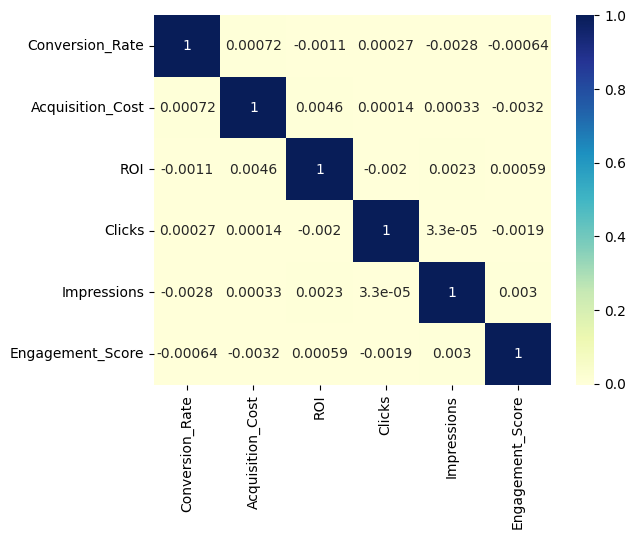

In [314]:
numeric_columns=df.select_dtypes(include='number').columns.tolist()
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='YlGnBu')
plt.show()

## **Hypothesis Testing using T Test for Email and Influencer Campaign Type for ROI**

In [315]:
  from scipy.stats import ttest_ind

  email_roi=df[df['Campaign_Type']=='Email']['ROI']
  influencer_roi =df[df['Campaign_Type']=='Influencer']['ROI']

In [316]:
t_stat,p_val=ttest_ind(email_roi,influencer_roi,equal_var=False)
print(f"T-statistics: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")
alpha = 0.05
if p_val < alpha:
    print("\n✅ Result: The difference in ROI between Email and Influencer campaigns is statistically significant (p < 0.05).")
    print("➡️ Interpretation: One campaign type performs better in terms of ROI. Further analysis can reveal which one.")
else:
    print("\n❌ Result: The difference in ROI between Email and Influencer campaigns is NOT statistically significant (p ≥ 0.05).")
    print("➡️ Interpretation: There's no strong evidence that one campaign outperforms the other in terms of ROI.")

T-statistics: -1.3680
P-Value: 0.1713

❌ Result: The difference in ROI between Email and Influencer campaigns is NOT statistically significant (p ≥ 0.05).
➡️ Interpretation: There's no strong evidence that one campaign outperforms the other in terms of ROI.


In [317]:
print(f"\nAverage ROI - Email: {email_roi.mean():.2f}")
print(f"Average ROI - Influencer: {influencer_roi.mean():.2f}")


Average ROI - Email: 4.99
Average ROI - Influencer: 5.01


## **Hypothesis Testing using ANOVA for Campaign Type and ROI**

In [318]:
from scipy.stats import f_oneway
groups=[group['ROI'].values for _,group in df.groupby('Campaign_Type')]
groups
f_stat,p_val =f_oneway(*groups)
print(f"F statistic: {f_stat:.4f}")
print(f"P Value: {p_val:.4f}")

F statistic: 1.0170
P Value: 0.3969


In [319]:
alpha = 0.05
if p_val < alpha:
    print("\n✅ Result: At least one campaign type has a significantly different average ROI (p < 0.05).")
    print("➡️ Interpretation: Continue with post-hoc analysis to find which ones differ.")
else:
    print("\n❌ Result: No statistically significant difference in ROI across campaign types (p ≥ 0.05).")



❌ Result: No statistically significant difference in ROI across campaign types (p ≥ 0.05).


In [320]:
df.groupby('Campaign_Type')['ROI'].mean().sort_values(ascending=False)

,ROI
Campaign_Type,
Influencer,5.011068
Search,5.008357
Display,5.006551
Email,4.994295
Social Media,4.991784


## **Regression Analysis to Predict ROI**

In [321]:
features=['Conversion_Rate', 'Acquisition_Cost', 'Clicks', 'Impressions',
       'Engagement_Score']
target='ROI'
x=df[features]
y=df[target]

In [322]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [323]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [324]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"R2 Score: {r2_score(y_test,y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred):.4f}")


R2 Score: -0.0002
Mean Squared Error: 3.0122


In [325]:
coeff_df=pd.DataFrame({
    'Features':features,
    'Coefficients':model.coef_
})
print(coeff_df.sort_values(by='Coefficients',key=abs,ascending=False))

           Features  Coefficients
0   Conversion_Rate     -0.096599
4  Engagement_Score     -0.000512
2            Clicks     -0.000009
3       Impressions      0.000003
1  Acquisition_Cost      0.000002


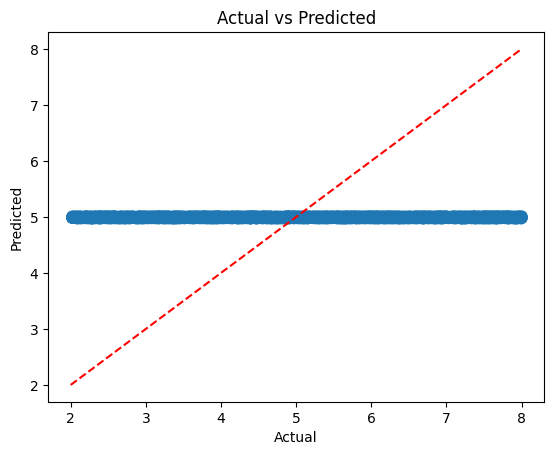

In [326]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
#plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Time Series Forecasting

In [327]:
daily_roi=df.groupby('Date')['ROI'].mean().reset_index()
daily_roi

,Date,ROI
0,2021-01-01,5.044489
1,2021-01-02,5.006551
2,2021-01-03,5.011442
3,2021-01-04,5.100420
4,2021-01-05,4.841150
...,...,...
360,2021-12-27,4.966252
361,2021-12-28,4.907148
362,2021-12-29,4.985759
363,2021-12-30,5.049909


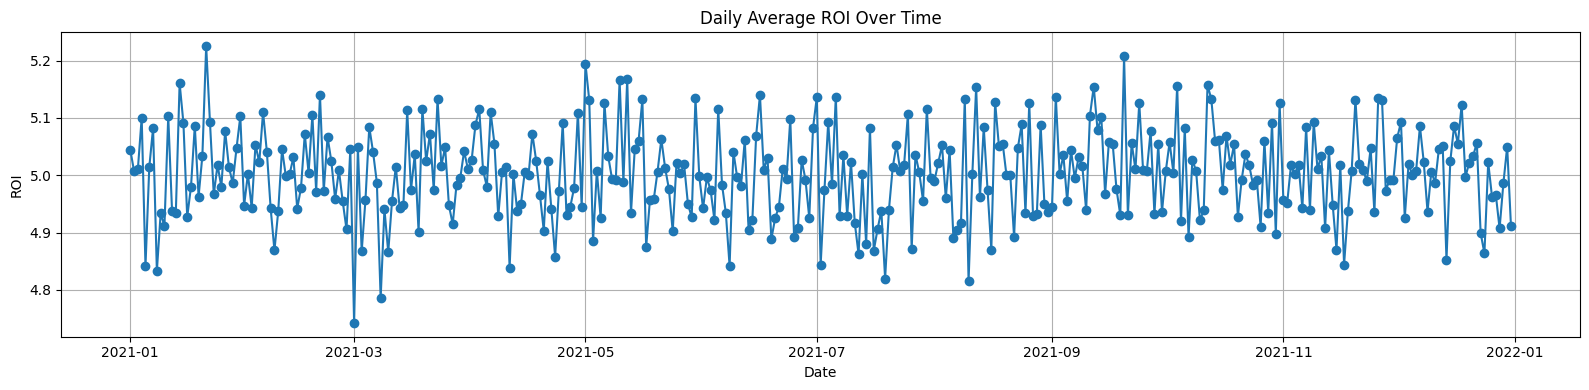

In [328]:
plt.figure(figsize=(16,4))
plt.plot(daily_roi['Date'],daily_roi['ROI'],marker='o',linestyle='-')
plt.xlabel('Date')
plt.ylabel('ROI')
plt.title('Daily Average ROI Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

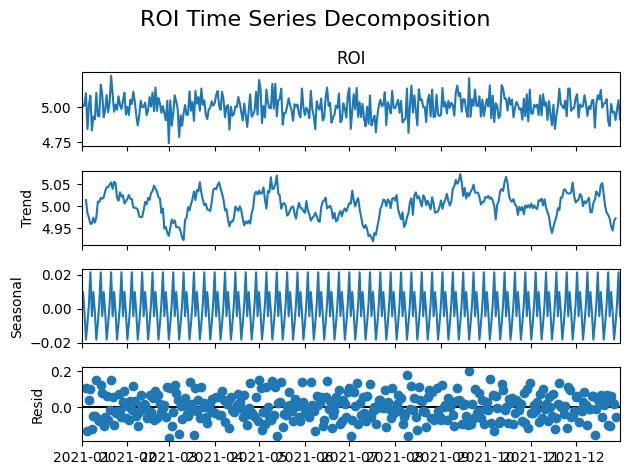

In [329]:
from statsmodels.tsa.seasonal import seasonal_decompose
daily_roi.set_index('Date',inplace=True)
daily_roi = daily_roi.sort_index()
result = seasonal_decompose(daily_roi['ROI'],model='additive',period=7)
result.plot()
plt.suptitle("ROI Time Series Decomposition", fontsize=16)
plt.tight_layout()
plt.show()

In [330]:
from statsmodels.tsa.stattools import adfuller

result1 =adfuller(daily_roi['ROI'])
print(f"ADF Statistic: {result1[0]:.4f}")
print(f"P-value: {result1[1]:.4f}")

ADF Statistic: -20.7268
P-value: 0.0000


In [334]:
from statsmodels.tsa.arima.model import ARIMA

arima_mod=ARIMA(daily_roi['ROI'],order=(1,1,1))
model_fit=arima_mod.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    ROI   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 406.689
Date:                Sat, 21 Jun 2025   AIC                           -807.378
Time:                        13:01:57   BIC                           -795.687
Sample:                    01-01-2021   HQIC                          -802.732
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0841      0.055     -1.537      0.124      -0.191       0.023
ma.L1         -0.9995      0.109     -9.178      0.000      -1.213      -0.786
sigma2         0.0062      0.001      7.796      0.0

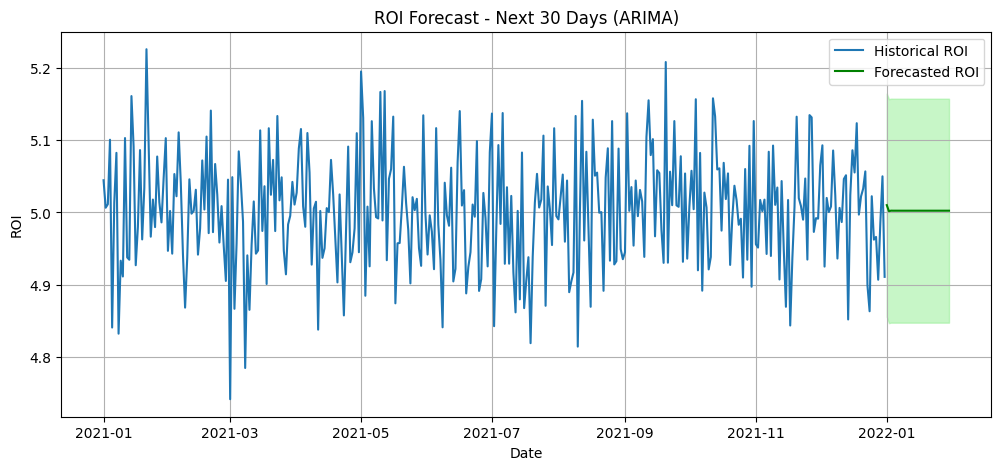

In [338]:
# Forecast next 30 periods
forecast = model_fit.get_forecast(steps=30)
forecast_df = forecast.summary_frame()

plt.figure(figsize=(12,5))
plt.plot(daily_roi, label='Historical ROI')
plt.plot(forecast_df['mean'], label='Forecasted ROI', color='green')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='lightgreen', alpha=0.5)
plt.title("ROI Forecast - Next 30 Days (ARIMA)")
plt.xlabel("Date")
plt.ylabel("ROI")
plt.legend()
plt.grid(True)
plt.show()
